# ARIMA Analysis for Thesis

In [1]:
import pandas as pd
import numpy as np

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')


In [2]:
# Display the first few rows of stock_yfinance_data
print(stock_yfinance_data.head())


        Date        Open        High         Low       Close   Adj Close  \
0  9/30/2021  260.333344  263.043335  258.333344  258.493347  258.493347   
1  10/1/2021  259.466675  260.260010  254.529999  258.406677  258.406677   
2  10/4/2021  265.500000  268.989990  258.706665  260.510010  260.510010   
3  10/5/2021  261.600006  265.769989  258.066681  260.196655  260.196655   
4  10/6/2021  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume Stock Name  
0  53868000       TSLA  
1  51094200       TSLA  
2  91449900       TSLA  
3  55297800       TSLA  
4  43898400       TSLA  


In [3]:
stock_yfinance_data.shape

(6300, 8)

In [4]:
stock_yfinance_data.tail

<bound method NDFrame.tail of            Date        Open        High         Low       Close   Adj Close  \
0     9/30/2021  260.333344  263.043335  258.333344  258.493347  258.493347   
1     10/1/2021  259.466675  260.260010  254.529999  258.406677  258.406677   
2     10/4/2021  265.500000  268.989990  258.706665  260.510010  260.510010   
3     10/5/2021  261.600006  265.769989  258.066681  260.196655  260.196655   
4     10/6/2021  258.733337  262.220001  257.739990  260.916656  260.916656   
...         ...         ...         ...         ...         ...         ...   
6295  9/23/2022   13.090000   13.892000   12.860000   13.710000   13.710000   
6296  9/26/2022   14.280000   14.830000   14.070000   14.370000   14.370000   
6297  9/27/2022   14.580000   14.800000   13.580000   13.710000   13.710000   
6298  9/28/2022   13.050000   13.421000   12.690000   13.330000   13.330000   
6299  9/29/2022   12.550000   12.850000   11.850000   12.110000   12.110000   

        Volume Stock 

In [5]:
# Check for missing or NaN values in stock_yfinance_data
missing_values = stock_yfinance_data.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64


In [6]:
# Check for missing values in the 'Close' column
missing_values = stock_yfinance_data['Close'].isnull().sum()

# Print the number of missing values
print("Number of missing values in the 'Close' column:", missing_values)


Number of missing values in the 'Close' column: 0


In [7]:
# Define the list of stock names to filter
stock_names = ['AAPL', 'AMZN', 'NFLX']

# Filter rows where 'Stock Name' is in the list of stock_names
filtered_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(stock_names)]

# Print the filtered data
print(filtered_data)


           Date        Open        High         Low       Close   Adj Close  \
1008  9/30/2021  165.800003  166.392502  163.699493  164.251999  164.251999   
1009  10/1/2021  164.450501  165.458496  162.796997  164.162994  164.162994   
1010  10/4/2021  163.969498  163.999496  158.812500  159.488998  159.488998   
1011  10/5/2021  160.225006  163.036499  160.123001  161.050003  161.050003   
1012  10/6/2021  160.676498  163.216995  159.931000  163.100494  163.100494   
...         ...         ...         ...         ...         ...         ...   
2263  9/23/2022  235.139999  236.449997  221.429993  226.410004  226.410004   
2264  9/26/2022  225.600006  232.699997  223.009995  224.070007  224.070007   
2265  9/27/2022  228.630005  230.639999  220.720001  224.360001  224.360001   
2266  9/28/2022  229.690002  246.649994  227.380005  245.199997  245.199997   
2267  9/29/2022  241.610001  246.979996  235.679993  239.710007  239.710007   

        Volume Stock Name  
1008  56848000       AM

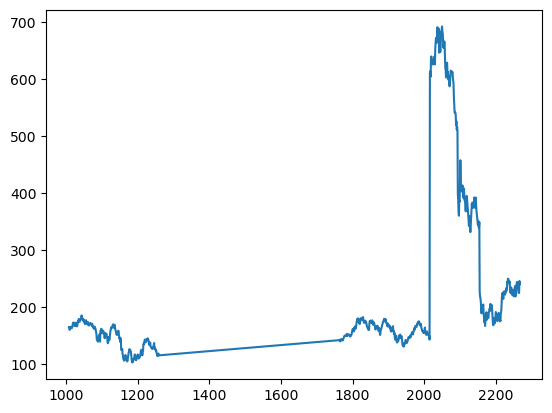

In [8]:
import matplotlib.pyplot as plt

plt.plot(filtered_data['Close'])
plt.show()


In [9]:
print(stock_tweets.head)

<bound method NDFrame.head of                             Date  \
0      2022-09-29 23:41:16+00:00   
1      2022-09-29 23:24:43+00:00   
2      2022-09-29 23:18:08+00:00   
3      2022-09-29 22:40:07+00:00   
4      2022-09-29 22:27:05+00:00   
...                          ...   
80788  2021-10-07 17:11:57+00:00   
80789  2021-10-04 17:05:59+00:00   
80790  2021-10-01 04:43:41+00:00   
80791  2021-10-01 00:03:32+00:00   
80792  2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
80788  Some of the fastest growing tech 

In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#analyzer = SentimentIntensityAnalyzer()

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Convert Date columns to date format
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date']).dt.date
stock_yfinance_data['Date'] = pd.to_datetime(stock_yfinance_data['Date']).dt.date

# Function to analyze sentiment
#def analyze_sentiment(tweet):
   # if pd.isnull(tweet):
       # return 0, 0, 0, 0  # Return 0 for all scores if the tweet is NaN
    #scores = analyzer.polarity_scores(tweet)
    #return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Apply sentiment analysis to the Tweet column
#stock_tweets[['Compound', 'Positive', 'Negative', 'Neutral']] = stock_tweets['Tweet'].apply(
   # lambda x: pd.Series(analyze_sentiment(x))
#)#

# Merge datasets on the Date column
merged_data = pd.merge(stock_yfinance_data, stock_tweets, on='Date', how='inner')

# Drop the duplicate 'Stock Name' column if it exists
if 'Stock Name_y' in merged_data.columns:
    merged_data = merged_data.drop(columns=['Stock Name_y'])

# Rename the 'Stock Name_x' column to 'Stock Name' if needed
if 'Stock Name_x' in merged_data.columns:
    merged_data = merged_data.rename(columns={'Stock Name_x': 'Stock Name'})

# Filter for specific stocks
filtered_data = merged_data[merged_data['Stock Name'].isin(['AAPL', 'NFLX', 'AMZN'])]

# Display the first few rows of the filtered data
print(filtered_data.head())


           Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  
712  Tesla, Inc.  
713  Tesla, 

# EDA for merged Data

Summary Statistics:
               Open          High           Low         Close     Adj Close  \
count  1.591900e+06  1.591900e+06  1.591900e+06  1.591900e+06  1.591900e+06   
mean   1.767987e+02  1.796943e+02  1.736320e+02  1.766217e+02  1.756742e+02   
std    1.355354e+02  1.373683e+02  1.335265e+02  1.354755e+02  1.351073e+02   
min    1.105000e+01  1.121000e+01  1.061000e+01  1.106000e+01  1.083750e+01   
25%    7.992000e+01  8.147000e+01  7.852000e+01  8.024000e+01  8.019643e+01   
50%    1.466100e+02  1.485800e+02  1.444600e+02  1.464500e+02  1.456364e+02   
75%    2.287300e+02  2.335500e+02  2.243000e+02  2.282200e+02  2.282200e+02   
max    6.923500e+02  7.009900e+02  6.860900e+02  6.916900e+02  6.916900e+02   

             Volume  
count  1.591900e+06  
mean   3.015789e+07  
std    3.532930e+07  
min    3.078000e+05  
25%    5.967900e+06  
50%    1.554160e+07  
75%    4.283660e+07  
max    3.116452e+08  


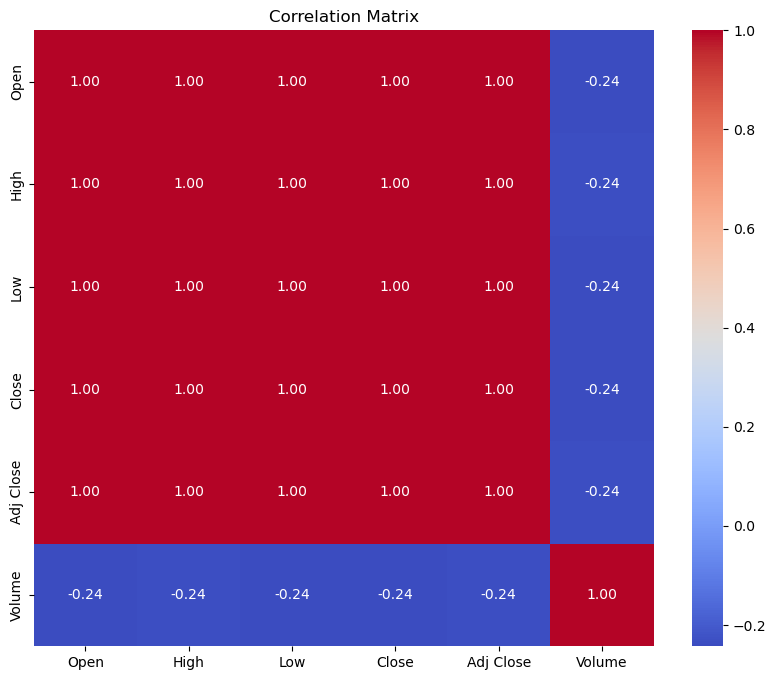

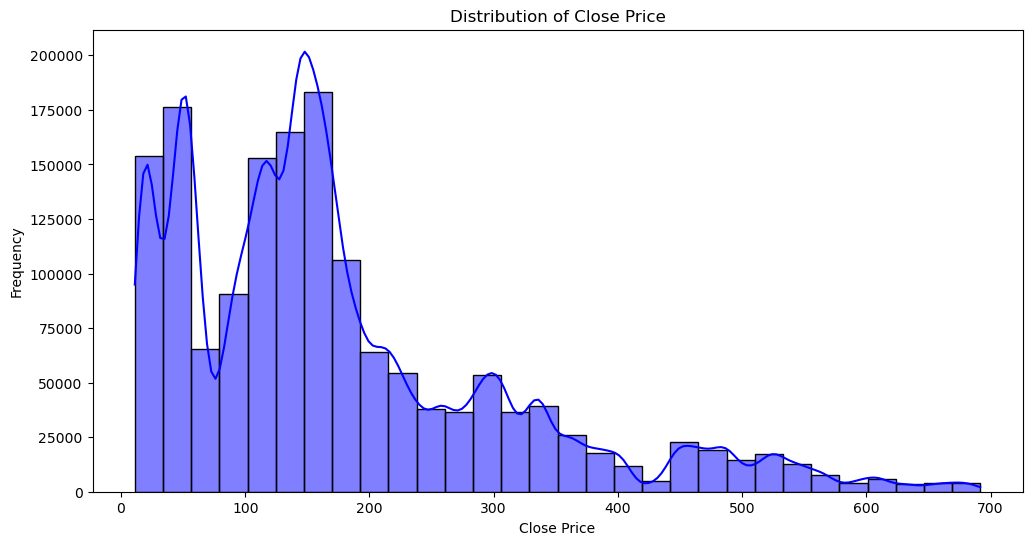

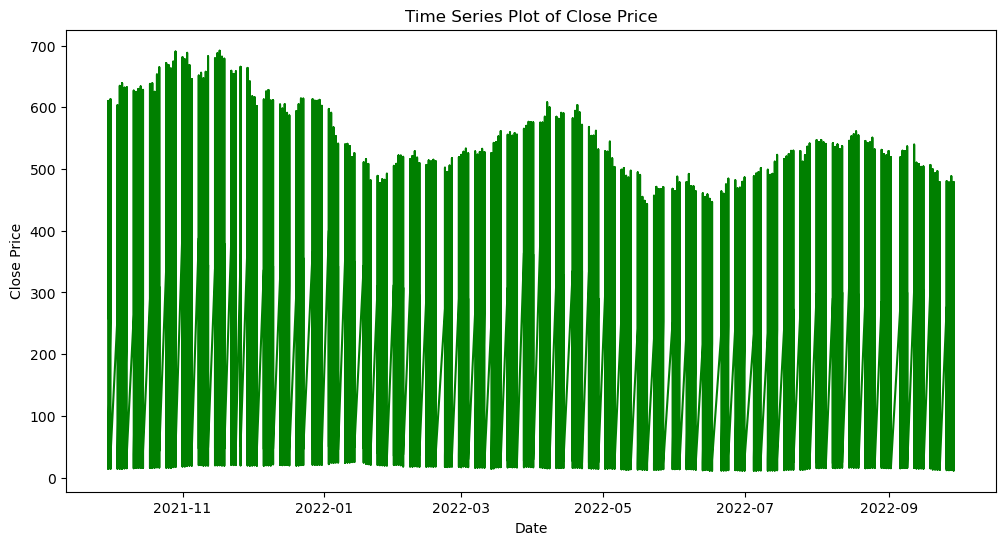

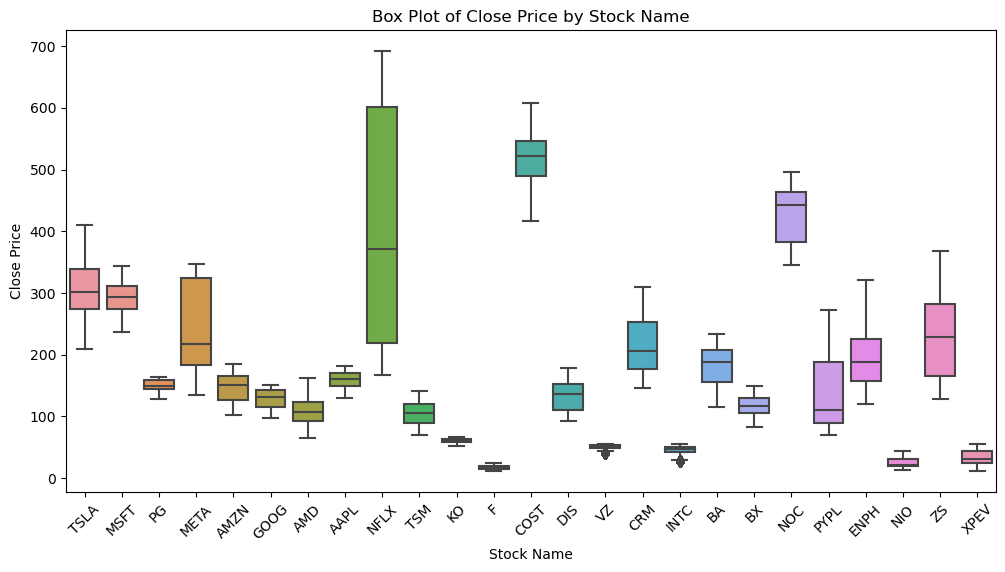

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Summary statistics
print("Summary Statistics:")
print(merged_data.describe())

# Correlation matrix
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Close'], bins=30, kde=True, color='blue')
plt.title("Distribution of Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Time series plot of Close Price
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], color='green')
plt.title("Time Series Plot of Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# Box plot of Close Price by Stock Name
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Stock Name', y='Close')
plt.title("Box Plot of Close Price by Stock Name")
plt.xlabel("Stock Name")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()




In [ ]:
##Mean: The average values for each price type (Open, High, Low, Close, Adj Close) are around 176 to 179,
#suggesting the stock prices hover around these values.
##The standard deviations are around 135 to 137, showing significant variability in stock prices.
###The median values (around 144 to 148) indicate the middle value of the prices.
##The maximum prices range from 686 to 701, indicating the highest observed stock prices.

# VADER ANALYSIS

In [13]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(tweet):
    if pd.isnull(tweet):
        return 0, 0, 0, 0  # Return 0 for all scores if the tweet is NaN
    scores = analyzer.polarity_scores(tweet)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Apply sentiment analysis to the Tweet column
filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_data['Tweet'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

/var/folders/58/r_9x1ybd5wb8ldz8z8xxgnbr0000gn/T/ipykernel_55319/2259699972.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_data['Tweet'].apply(
/var/folders/58/r_9x1ybd5wb8ldz8z8xxgnbr0000gn/T/ipykernel_55319/2259699972.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['Compound', 'Positive', 'Negative', 'Neutral']] = filtered_data['Tweet'].apply(
/var/folders/58/r_9x1ybd5wb8ldz8z8xxgnbr0000gn/T/ipykernel_55319

In [14]:
print(filtered_data.head())

           Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  Compound  Positive  Negative  Ne

In [15]:
import re

# Filter tweet data for NFLX and AMZN
filtered_stock2 = filtered_data[filtered_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Text preprocessing function
def preprocess_tweet(tweet):
    '''Clean text data, removing special characters and URLs'''
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove RT (retweet) text
    tweet = re.sub('RT @\w+: ', '', tweet)
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r"[^\w\s]", '', tweet)
    return tweet

def remove_emoticons(tweet):
    # Define emoticon pattern
    emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002700-\U000027BF\U00002600-\U000026FF\U00002B50\U00002B55\U0001F004\U0001F0CF\U0001F18E\U0001F191-\U0001F19A\U0001F1E6-\U0001F1FF\U0001F201\U0001F202\U0001F21A\U0001F22F\U0001F232-\U0001F23A\U0001F250-\U0001F251\U0001F300-\U0001F320\U0001F321-\U0001F32C\U0001F32D-\U0001F32F\U0001F330-\U0001F335\U0001F336\U0001F337-\U0001F37C\U0001F37D\U0001F37E-\U0001F37F\U0001F380-\U0001F393\U0001F394-\U0001F39F\U0001F3A0-\U0001F3C4\U0001F3C5-\U0001F3C7]'
    # Remove emoticons using regex
    return re.sub(emoticon_pattern, '', text)


# Print cleaned tweets
for tweet in filtered_stock2['Tweet']:
    cleaned_tweet = preprocess_tweet(tweet)
    print(cleaned_tweet)

lottofriday watchlist short amp sweet

amd over 1045 105c
roku over 317 320c
nvda below 207 205p
tsla below 774 770p

i will be guiding my entries amp exits in real time via voice chat at gaaoptionsvip 

good luck traders
correction update

update on q3 delivery estimates

 factset  204k
 wall street  221k
 gary  226k
 troy  235k today upgrade
 twitter bulls  230k240k
 wilson frunkpuppy 240k
 goldie  246k
 robtesla daily  247k
 giddy  250k
 umbisam   gt250k
tsla 
free options ideas 

scale out when above 25 profit

tsla   790c gt78887  775p lt77509
nio     36c gt3596  35p lt3532
mu      73c gt7256  70p lt7086
snap  76c gt7521  72p lt7226

199  for more secret bonus picks

tsla very rare double ib last seen in 2020 
california dmv today issued autonomous vehicle permits to cruise and waymo to charge the public for autonomous rides in select bay area cities to receive permits vehicles must meet the definition of sae level 34or 5 autonomous technology tsla 
chamath appreciate the clarific

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [91]:
filtered_stock2.head(10)


Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
717  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
718  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
719  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
720  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
721  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   
717  56848000       AMZN  ♠️#LottoFriday♠️\n\nHigh risk, secure profits!...   
718  56848000       AMZN  wow. FSD Beta 10.1 is incredibly good. Not per...   
719  56848000       AMZN  To set the record straight, my comments yester...   
720  56848000       AMZN  UPDATE on Q3 Delivery Estimates:\n\n* FactSet ...   
721  56848000       AMZN  $TSLA Little teaser, more pictures soon 😍🚀🙌🏻\n...   

    Company Name  Compound  Positive  Negative  Neutral  Sentiments  
712  Tesla, Inc.    0.8478     0.203     0.000    0.797      1.8478  
713  Tesla, Inc.   -0.1531     0.000     0.045    0.955      0.8469  
714  Tesla, Inc.    0.9083     0.210     0.000    0.790      1.9083  
715  Tesla, Inc.    0.0000     0.000     0.000    1.000      1.0000  
716  Tesla, Inc.    0.4019     0.083     0.000    0.917      1.4019  
717  Tesla, Inc.    0.8168     0.210     0.046    0.744      1.8168  
718  Tesla, Inc.    0.7687     0.200     0.049    0.751      1.7687  
719  Tesla, Inc.    0.7351     0.153     0.000    0.847      1.7351  
720  Tesla, Inc.    0.0000     0.000     0.000    1.000      1.0000  
721  Tesla, Inc.   -0.1796     0.000     0.146    0.854      0.8204

In [17]:
unique_stock_names = filtered_stock2['Stock Name'].unique()
print("Unique stock names in the filtered data:", unique_stock_names)

Unique stock names in the filtered data: ['AMZN' 'AAPL' 'NFLX']


In [18]:
# Combine Compound, Negative, Positive, and Neutral into one column 'Sentiments'
filtered_stock2['Sentiments'] = filtered_stock2[['Compound', 'Negative', 'Positive', 'Neutral']].sum(axis=1)

# Display the DataFrame with the new 'Sentiments' column
print(filtered_stock2.head())


           Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  Compound  Positive  Negative  Ne

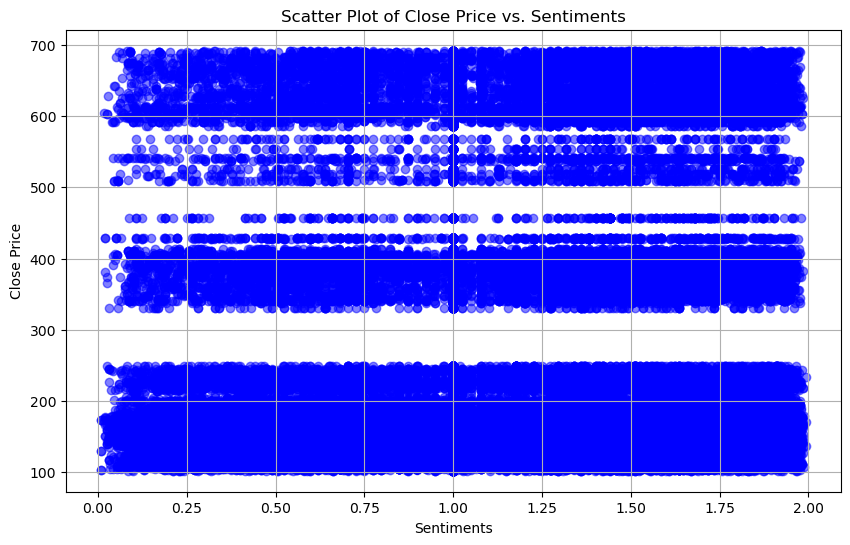

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of Close Price vs. Sentiments
plt.figure(figsize=(10, 6))
plt.scatter(filtered_stock2['Sentiments'], filtered_stock2['Close'], color='blue', alpha=0.5)

# Set plot title and labels
plt.title('Scatter Plot of Close Price vs. Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Close Price')

# Show plot
plt.grid(True)
plt.show()


In [20]:
# Create a new DataFrame with 'Close', 'Date', and 'Sentiments' columns
new_df= filtered_stock2[['Close', 'Date', 'Sentiments']].copy()

# Display the new DataFrame
print(new_df.head())


          Close        Date  Sentiments
712  164.251999  2021-09-30      1.8478
713  164.251999  2021-09-30      0.8469
714  164.251999  2021-09-30      1.9083
715  164.251999  2021-09-30      1.0000
716  164.251999  2021-09-30      1.4019


In [21]:
print(new_df.Date)

712        2021-09-30
713        2021-09-30
714        2021-09-30
715        2021-09-30
716        2021-09-30
              ...    
1588311    2022-09-29
1588312    2022-09-29
1588313    2022-09-29
1588314    2022-09-29
1588315    2022-09-29
Name: Date, Length: 191028, dtype: object


In [22]:
# Display the new DataFrame
print(new_df.head())

          Close        Date  Sentiments
712  164.251999  2021-09-30      1.8478
713  164.251999  2021-09-30      0.8469
714  164.251999  2021-09-30      1.9083
715  164.251999  2021-09-30      1.0000
716  164.251999  2021-09-30      1.4019


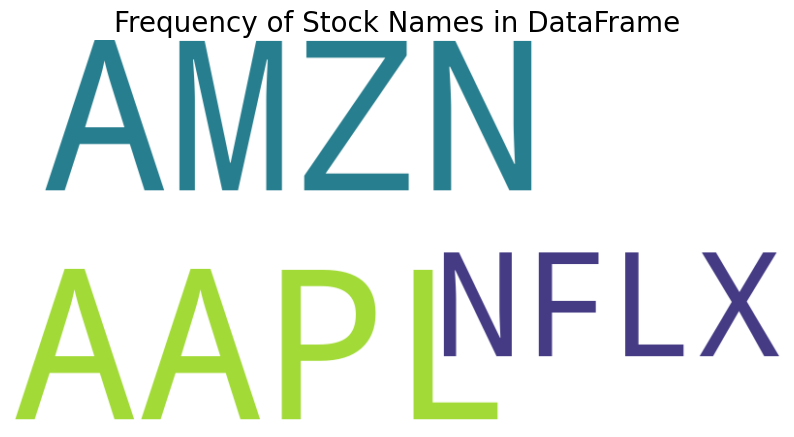

In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a text string with all the stock names
text = ' '.join(stock for stock in filtered_data['Stock Name'])

# Generate the word cloud
wordcloud = WordCloud(collocations=False, background_color='white', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of Stock Names in DataFrame', fontsize=20)
plt.show()

# ARIMA ANALYSIS

In [28]:
 #Define the ARIMA model order (p, d, q)

p, d, q = 5, 1, 0  # Example order; these may need to be adjusted

# Split data into train and test sets (70% train, 30% test)
train_size = int(len(new_df) * 0.7)
train, test = new_df['Close'][:train_size], new_df['Close'][train_size:]


In [29]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:               133719
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -569313.054
Date:                Mon, 27 May 2024   AIC                        1138638.109
Time:                        23:27:43   BIC                        1138696.929
Sample:                             0   HQIC                       1138655.729
                             - 133719                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0        nan        nan        nan         nan         nan
ar.L2              -0   6.27e-11         -0      1.000   -1.23e-10    1.23e-10
ar.L3               0   2.38e-09          0      1.0

In [30]:
# Make predictions
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1], dynamic=False)
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

# Make predictions
train_predict = model_fit.predict(start=train.index[0], end=train.index[-1], dynamic=False)
test_predict = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Calculate performance metrics for the test set
test_rmse = np.sqrt(mean_squared_error(test, test_predict[:len(test)]))
test_r2 = r2_score(test, test_predict[:len(test)])
test_mae = mean_absolute_error(test, test_predict[:len(test)])
test_mape = np.mean(np.abs((test - test_predict[:len(test)]) / test)) * 100

print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R-squared: {test_r2:.2f}')
print(f'Test MAE: {test_mae:.2f}')
print(f'Test MAPE: {test_mape:.2f}%')


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Test RMSE: 49.65
Test R-squared: -0.51
Test MAE: 44.28
Test MAPE: 37.94%


In [ ]:
### Rolling Window for betetr R Squared

In [32]:
import pandas as pd

# Calculate rolling mean and rolling standard deviation
window_size = 5  # we can adjust the window size as needed
new_df['Rolling_Mean'] = new_df['Close'].rolling(window=window_size).mean()
new_df['Rolling_Std'] = new_df['Close'].rolling(window=window_size).std()

# Drop NaN values resulting from the rolling window
new_df.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = new_df[['Rolling_Mean', 'Rolling_Std']]
y = new_df['Close']

# Split data into train and test sets
train_size = int(len(new_df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#  X_train, X_test, y_train, y_test to train and evaluate predictive model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 24.585520094058854


In [33]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.9849683986123275


In [34]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)


In [35]:
# Compute RAME
rame = mae / y_test.mean()


In [36]:

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Relative Absolute Mean Error (RAME):", rame)


Mean Absolute Error (MAE): 0.7540719952288706
Relative Absolute Mean Error (RAME): 0.004661669873725812


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the results
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 4.958378776783683
Mean Absolute Percentage Error (MAPE): 0.5195839644133473


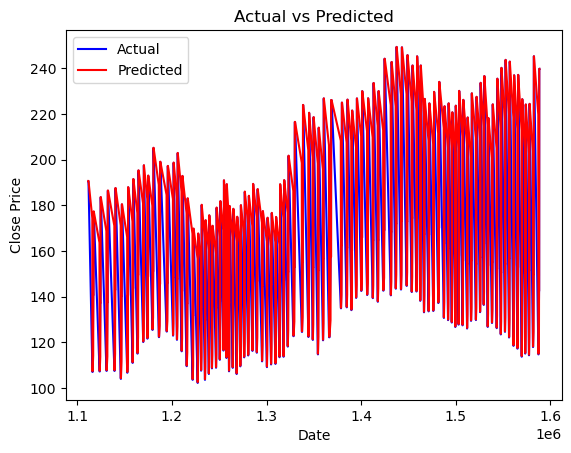

In [37]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_test.index, y_pred, label='Predicted', color='red')

# Set plot title and labels
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show plot
plt.show()


In [ ]:
### Feature Engineering of Lag and Exponential Moving Average

In [82]:
import pandas as pd

# feature engineering techniques
# 1. Adding lag features
new_df['Close_Lag1'] = new_df['Close'].shift(1)  # Lag 1 day
new_df['Close_Lag7'] = new_df['Close'].shift(7)  # Lag 7 days

# 2. Rolling statistics
window_size = 5
new_df['Rolling_Mean'] = new_df['Close'].rolling(window=window_size).mean()
new_df['Rolling_Std'] = new_df['Close'].rolling(window=window_size).std()

# 3. Exponential moving average
new_df['EMA'] = new_df['Close'].ewm(span=window_size, min_periods=window_size).mean()

# 4. Difference between current and lagged values
new_df['Close_Diff'] = new_df['Close'].diff()


# Drop NaN values resulting from feature engineering
new_df.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = new_df.drop('Close', axis=1) 
y = new_df['Close'] 



In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.2910272186017017e-27


In [147]:

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Root Mean Squared Error (RMSE): 5.64682106755062e-15
R-squared (R2): 1.0


In [40]:
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform ADF test on the 'Close' column
print("\nADF Test on 'Close' Column:")
adf_test(new_df['Close'])

#  perform ADF test on differenced data, for example:
new_df['Close_diff'] = new_df['Close'].diff().dropna()
new_df.dropna(inplace=True)  # Drop NaN values resulting from differencing

print("\nADF Test on Differenced 'Close' Column:")
adf_test(new_df['Close_diff'])


ADF Test on 'Close' Column:
ADF Statistic: -20.743271165441076
p-value: 0.0
Critical Values:
   1%: -3.430384233510501
   5%: -2.8615551307547573
   10%: -2.5667780535574516

ADF Test on Differenced 'Close' Column:
ADF Statistic: -437.0583488311928
p-value: 0.0
Critical Values:
   1%: -3.4303842336897157
   5%: -2.8615551308339673
   10%: -2.566778053599612


Mean Squared Error: 24.586379872653517

ADF Test on 'Close' Column:
ADF Statistic: -20.74305210903329
p-value: 0.0
Critical Values:
   1%: -3.4303842344065933
   5%: -2.861555131150816
   10%: -2.56677805376826

ADF Test on Differenced 'Close' Column:
ADF Statistic: -437.0526287337177
p-value: 0.0
Critical Values:
   1%: -3.4303842345858175
   5%: -2.8615551312300305
   10%: -2.5667780538104226


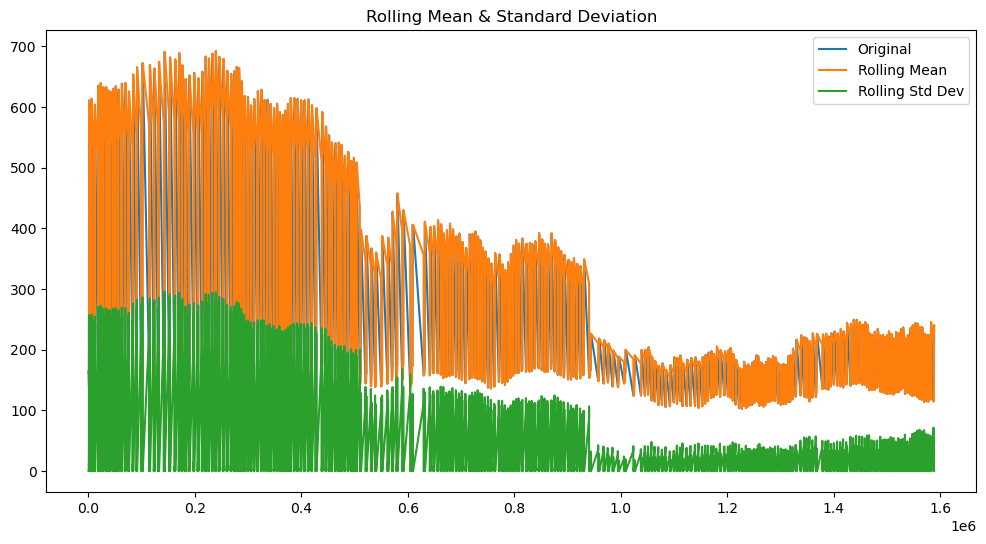

In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Calculate rolling mean and rolling standard deviation
window_size = 5  
new_df['Rolling_Mean'] = new_df['Close'].rolling(window=window_size).mean()
new_df['Rolling_Std'] = new_df['Close'].rolling(window=window_size).std()

# Drop NaN values resulting from the rolling window
new_df.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = new_df[['Rolling_Mean', 'Rolling_Std']]
y = new_df['Close']

# Split data into train and test sets
train_size = int(len(new_df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform ADF test on the 'Close' column
print("\nADF Test on 'Close' Column:")
adf_test(new_df['Close'])

# Differencing the 'Close' column
new_df['Close_diff'] = new_df['Close'].diff()

# Drop NaN values resulting from differencing
new_df.dropna(inplace=True)

# Perform ADF test on the differenced 'Close' column
print("\nADF Test on Differenced 'Close' Column:")
adf_test(new_df['Close_diff'])

# Plotting the Rolling Statistics
plt.figure(figsize=(12, 6))
plt.plot(new_df['Close'], label='Original')
plt.plot(new_df['Rolling_Mean'], label='Rolling Mean')
plt.plot(new_df['Rolling_Std'], label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [ ]:
###using Seasonal Decomposition of Time Series (STL) to isolate and analyze seasonal components.


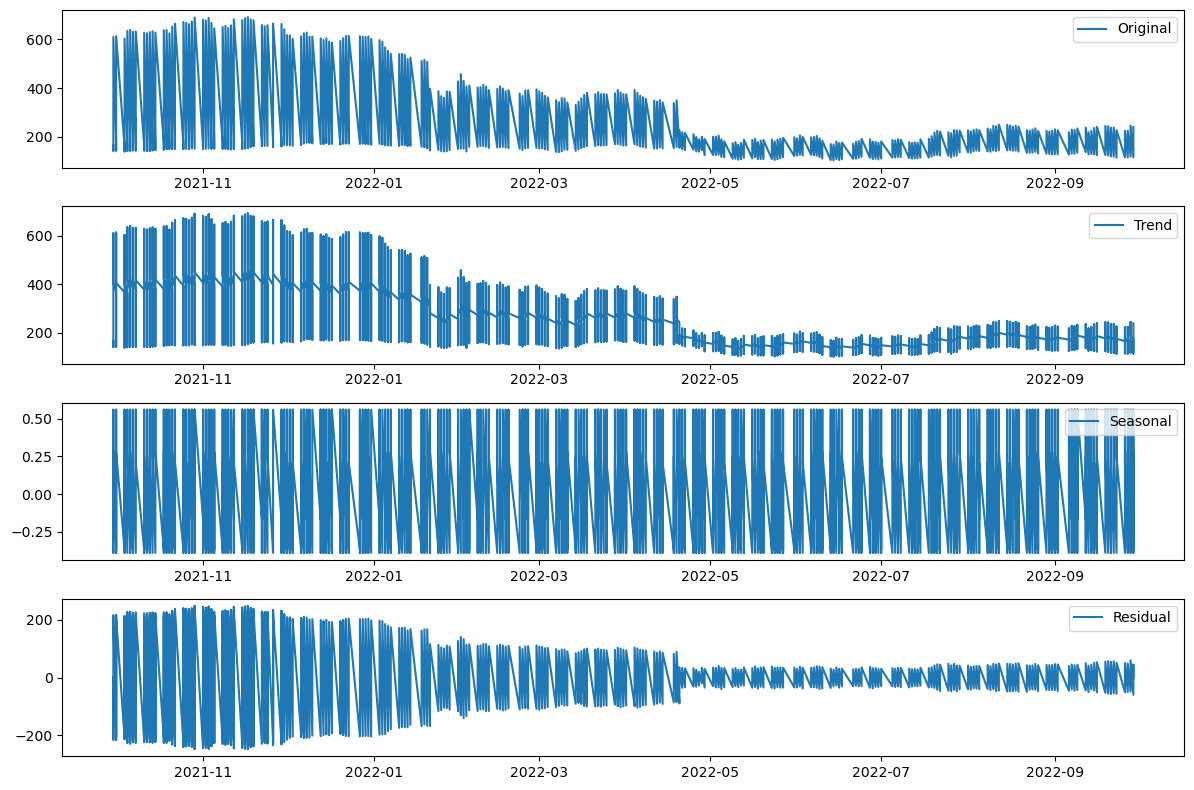

Trend Component:
 Date
2021-09-30    164.251999
2021-09-30    164.251999
2021-09-30    164.251999
2021-09-30    164.251999
2021-09-30    164.251999
Name: Trend, dtype: float64
Seasonal Component:
 Date
2021-09-30    0.004472
2021-09-30    0.279232
2021-09-30   -0.367843
2021-09-30   -0.054725
2021-09-30    0.246859
Name: Seasonal, dtype: float64
Residual Component:
 Date
2021-09-30   -0.004472
2021-09-30   -0.279232
2021-09-30    0.367843
2021-09-30    0.054725
2021-09-30   -0.246859
Name: Residual, dtype: float64


In [46]:
# Check if 'Date' is in the columns or if it is the index
if 'Date' not in new_df.columns:
    if new_df.index.name == 'Date':
        new_df.reset_index(inplace=True)
    else:
        raise KeyError("The DataFrame does not have a 'Date' column or index.")

# Convert 'Date' to datetime 
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Set 'Date' as the index
new_df.set_index('Date', inplace=True)

# Ensure data is sorted by date
new_df.sort_index(inplace=True)

# Perform seasonal decomposition
# Adjust period based on the frequency of data
result = seasonal_decompose(new_df['Close'], model='additive', period=12)

# Drop NaN values resulting from the decomposition
decomposed_df = pd.DataFrame({
    'Close': new_df['Close'],
    'Trend': result.trend,
    'Seasonal': result.seasonal,
    'Residual': result.resid
}).dropna()

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposed_df.index, decomposed_df['Close'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposed_df.index, decomposed_df['Trend'], label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposed_df.index, decomposed_df['Seasonal'], label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposed_df.index, decomposed_df['Residual'], label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Print the first few rows of each component
print("Trend Component:\n", decomposed_df['Trend'].head())
print("Seasonal Component:\n", decomposed_df['Seasonal'].head())
print("Residual Component:\n", decomposed_df['Residual'].head())


In [150]:
 import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Check if 'Date' is in the columns or if it is the index
if 'Date' not in new_df.columns:
    if new_df.index.name == 'Date':
        new_df.reset_index(inplace=True)
    else:
        raise KeyError("The DataFrame does not have a 'Date' column or index.")

# Convert 'Date' to datetime 
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Set 'Date' as the index
new_df.set_index('Date', inplace=True)

# Ensure data is sorted by date
new_df.sort_index(inplace=True)

# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Adjust period based on the frequency of data
result = seasonal_decompose(new_df['Close'], model='additive', period=12)

# Drop NaN values resulting from the decomposition
decomposed_df = pd.DataFrame({
    'Close': new_df['Close'],
    'Trend': result.trend,
    'Seasonal': result.seasonal,
    'Residual': result.resid
}).dropna()


# Define the order (p,d,q) - 
order = (1, 1, 1)  

# Fit the ARIMA model
arima_model = ARIMA(decomposed_df['Residual'], order=order)
arima_result = arima_model.fit()

# Display the summary of the model
print(arima_result.summary())


# Example: Forecasting the next 10 periods
forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:               Residual   No. Observations:                   81
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -86.333
Date:                Thu, 30 May 2024   AIC                            178.666
Time:                        19:44:31   BIC                            185.812
Sample:                    11-14-2021   HQIC                           181.531
                         - 02-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5628      0.133      4.221      0.000       0.302       0.824
ma.L1         -0.9997      7.821     -0.128      0.898     -16.328      14.329
sigma2         0.4873      3.794      0.128      0.8

In [151]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


order = (1, 1, 1)  

# Fit the ARIMA model
arima_model = ARIMA(decomposed_df['Residual'], order=order)
arima_result = arima_model.fit()

# Display the summary of the model
print(arima_result.summary())

# Calculate residuals of the ARIMA model
residuals = decomposed_df['Residual'] - arima_result.fittedvalues

# Calculate R-squared
ss_total = np.sum((decomposed_df['Residual'] - np.mean(decomposed_df['Residual'])) ** 2)
ss_res = np.sum(residuals ** 2)
r_squared = 1 - (ss_res / ss_total)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(decomposed_df['Residual'], arima_result.fittedvalues))

# Calculate MAE
mae = mean_absolute_error(decomposed_df['Residual'], arima_result.fittedvalues)

print(f'R-squared: {r_squared}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# 

forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)
print(forecast)


                               SARIMAX Results                                
Dep. Variable:               Residual   No. Observations:                   81
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -86.333
Date:                Thu, 30 May 2024   AIC                            178.666
Time:                        19:45:40   BIC                            185.812
Sample:                    11-14-2021   HQIC                           181.531
                         - 02-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5628      0.133      4.221      0.000       0.302       0.824
ma.L1         -0.9997      7.821     -0.128      0.898     -16.328      14.329
sigma2         0.4873      3.794      0.128      0.8

In [155]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(decomposed_df['Residual'], arima_result.fittedvalues))
print(rmse)


0.7040025378507131


In [157]:
# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

2.3318612342837504e-15


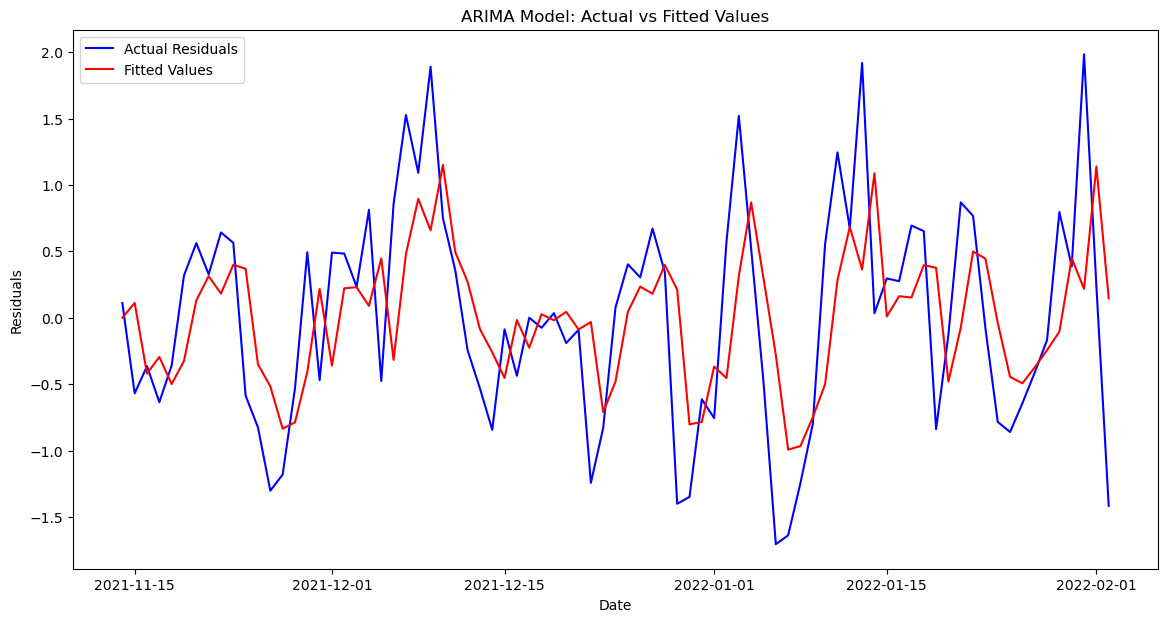

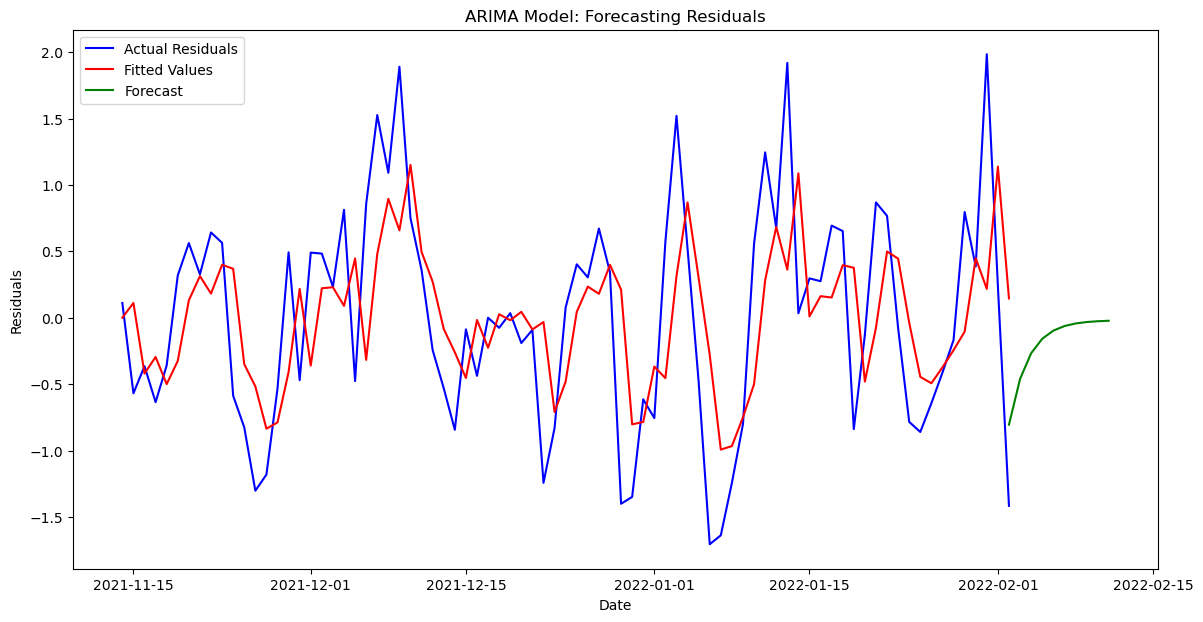

In [152]:
import matplotlib.pyplot as plt

# Fit ARIMA model on the residual component
# Define the order (p,d,q) - 
order = (1, 1, 1)  # 
# Fit the ARIMA model
arima_model = ARIMA(decomposed_df['Residual'], order=order)
arima_result = arima_model.fit()

# Calculate the fitted values
fitted_values = arima_result.fittedvalues

# Plot actual residuals and fitted values
plt.figure(figsize=(14, 7))
plt.plot(decomposed_df['Residual'], label='Actual Residuals', color='blue')
plt.plot(fitted_values, label='Fitted Values', color='red')
plt.title('ARIMA Model: Actual vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(decomposed_df.index, decomposed_df['Residual'], label='Actual Residuals', color='blue')
plt.plot(fitted_values.index, fitted_values, label='Fitted Values', color='red')
plt.plot(pd.date_range(decomposed_df.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast', color='green')
plt.title('ARIMA Model: Forecasting Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [ ]:
##Good model fit show the red line (fitted values) closely following the blue line (actual residuals).

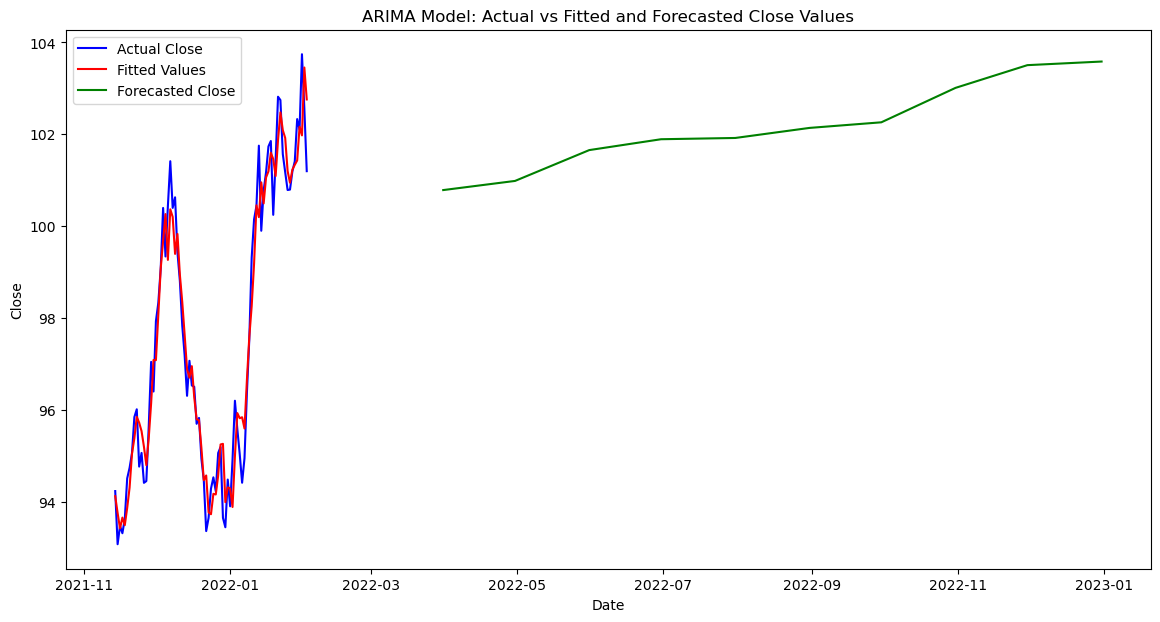

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Check if 'Date' is in the columns or if it is the index
if 'Date' not in new_df.columns:
    if new_df.index.name == 'Date':
        new_df.reset_index(inplace=True)
    else:
        raise KeyError("The DataFrame does not have a 'Date' column or index.")

# Convert 'Date' to datetime 
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Set 'Date' as the index
new_df.set_index('Date', inplace=True)

# Ensure data is sorted by date
new_df.sort_index(inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(new_df['Close'], model='additive', period=12)

# Drop NaN values resulting from the decomposition
decomposed_df = pd.DataFrame({
    'Close': new_df['Close'],
    'Trend': result.trend,
    'Seasonal': result.seasonal,
    'Residual': result.resid
}).dropna()

# Fit ARIMA model on the residual component
order = (1, 1, 1)  

# Fit the ARIMA model
arima_model = ARIMA(decomposed_df['Residual'], order=order)
arima_result = arima_model.fit()

# Calculate the fitted values
fitted_values = arima_result.fittedvalues

# Forecast the next 10 periods
forecast_steps = 10
forecast_residuals = arima_result.forecast(steps=forecast_steps)

# Create date range for forecasted values
forecast_index = pd.date_range(decomposed_df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Combine the trend and seasonal components with the forecasted residuals
trend_forecast = decomposed_df['Trend'][-forecast_steps:].values + decomposed_df['Trend'].diff().mean() * np.arange(1, forecast_steps + 1)
seasonal_forecast = decomposed_df['Seasonal'][:forecast_steps].values
forecast_close = trend_forecast + seasonal_forecast + forecast_residuals.values

# Plot the actual 'Close' values and the forecasted 'Close' values
plt.figure(figsize=(14, 7))
plt.plot(decomposed_df.index, decomposed_df['Close'], label='Actual Close', color='blue')
plt.plot(decomposed_df.index, decomposed_df['Trend'] + decomposed_df['Seasonal'] + fitted_values, label='Fitted Values', color='red')
plt.plot(forecast_index, forecast_close, label='Forecasted Close', color='green')
plt.title('ARIMA Model: Actual vs Fitted and Forecasted Close Values')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Fit ARIMA model (example: ARIMA(1, 1, 1))
order = (1, 1, 1)
arima_model = ARIMA(decomposed_df['Residual'], order=order)
arima_result = arima_model.fit()

# Generate the summary of the ARIMA model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:               Residual   No. Observations:                   81
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -86.333
Date:                Fri, 31 May 2024   AIC                            178.666
Time:                        14:32:01   BIC                            185.812
Sample:                    11-14-2021   HQIC                           181.531
                         - 02-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5628      0.133      4.221      0.000       0.302       0.824
ma.L1         -0.9997      7.821     -0.128      0.898     -16.328      14.329
sigma2         0.4873      3.794      0.128      0.8

In [159]:
# Forecasting the next 10 periods
forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)
print(forecast)


2022-02-03   -0.805389
2022-02-04   -0.461382
2022-02-05   -0.267765
2022-02-06   -0.158791
2022-02-07   -0.097458
2022-02-08   -0.062937
2022-02-09   -0.043508
2022-02-10   -0.032573
2022-02-11   -0.026418
2022-02-12   -0.022954
Freq: D, Name: predicted_mean, dtype: float64


In [160]:
# Calculate residuals (difference between actual and fitted values)
residuals = decomposed_df['Residual'] - arima_result.fittedvalues


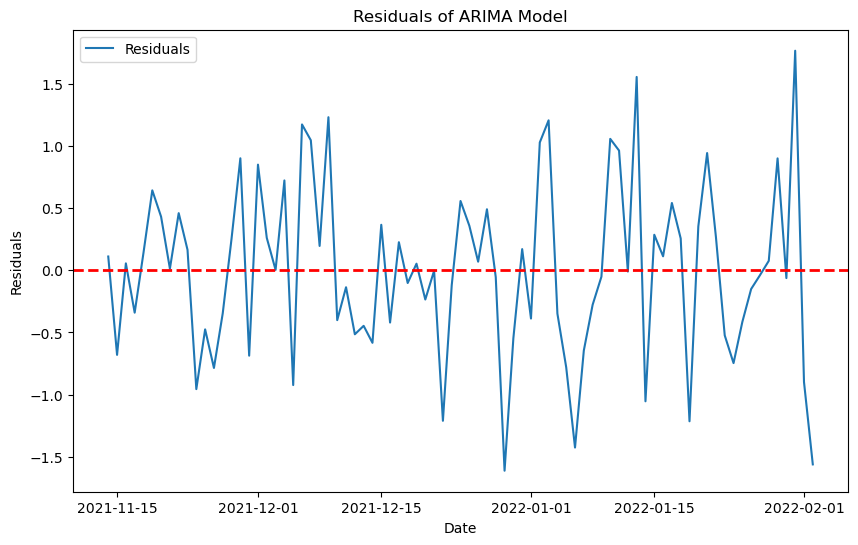

In [161]:
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [162]:
from scipy.stats import normaltest

# Normality test
stat, p = normaltest(residuals.dropna())
print('Normality test statistic:', stat)
print('p-value:', p)

# The null hypothesis of the test is that the data was drawn from a normal distribution.
# If the p-value is less than 0.05, we reject the null hypothesis and conclude that the residuals are
#not normally distributed.


Normality test statistic: 0.04959873122723886
p-value: 0.9755056123655154


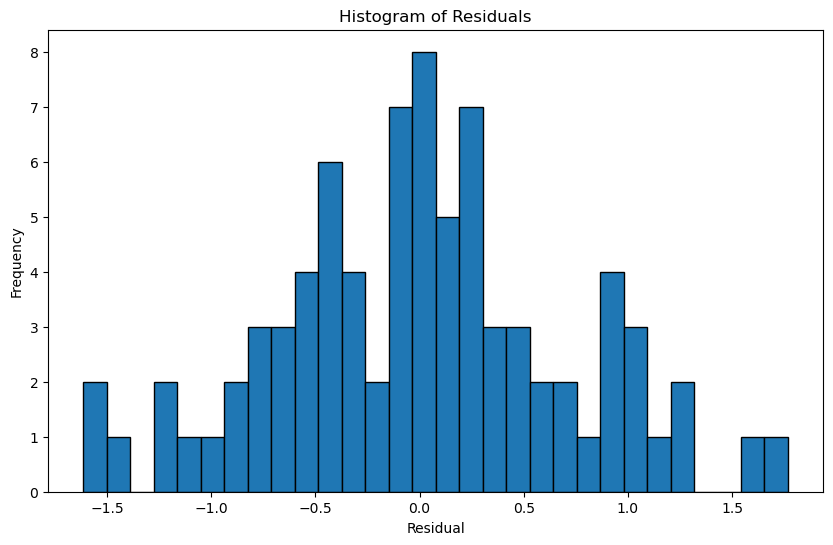

In [163]:
plt.figure(figsize=(10, 6))
plt.hist(residuals.dropna(), bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [164]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
print(lb_test)


      lb_stat  lb_pvalue
10  21.064234    0.02065


In [ ]:
###Since the p-value (0.02065) is less than the common significance level of 0.05, we reject the null hypothesis. This suggests that there is significant autocorrelation in the residuals up to lag 10, 
#indicating that the residuals are not white noise.

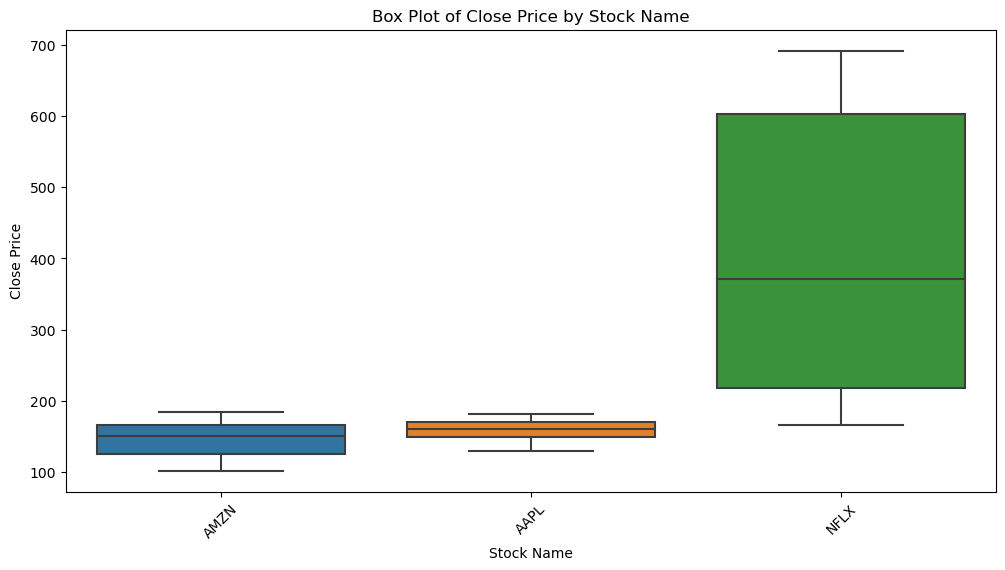

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame
filtered_data = merged_data.query('`Stock Name` in ["AAPL", "AMZN", "NFLX"]')

# Box plot of Close Price by Stock Name
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Stock Name', y='Close')
plt.title("Box Plot of Close Price by Stock Name")
plt.xlabel("Stock Name")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()


In [166]:
filtered_stock2.head()

Date        Open        High         Low       Close   Adj Close  \
712  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
713  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
714  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
715  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
716  2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

       Volume Stock Name                                              Tweet  \
712  56848000       AMZN  #LottoFriday Watchlist: short &amp; sweet\n\n$...   
713  56848000       AMZN  CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...   
714  56848000       AMZN  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...   
715  56848000       AMZN  California DMV today issued autonomous vehicle...   
716  56848000       AMZN  @chamath Appreciate the clarification @chamath...   

    Company Name  Compound  Positive  Negative  Neutral  Sentiments  
712  Tesla, Inc.    0.8478     0.203     0.000    0.797      1.8478  
713  Tesla, Inc.   -0.1531     0.000     0.045    0.955      0.8469  
714  Tesla, Inc.    0.9083     0.210     0.000    0.790      1.9083  
715  Tesla, Inc.    0.0000     0.000     0.000    1.000      1.0000  
716  Tesla, Inc.    0.4019     0.083     0.000    0.917      1.4019